# Log-minors of covariance matrices

### Why do I care?

For several multivariate stochastic processes, log-determinants of covariance matrices can be used to estimate the entropy of a system. Mean log-minors can be used to estimate mean subsystem entropy. Mean subsystem entropy is a quantity of interest in some subfields of physics and neuroscience. (Also, for computing redundancy in my Ornstein--Uhlenbeck networks.)

Computing the exact value of mean subsystem entropy requires that we compute all nCr minors. This becomes impossible for large systems. So one needs to replace the mean with a sample mean. If I am able to predict (reasonable upper bounds for) the standard deviation for log-minors of a given covariance matrix, then I can make an informed decision regarding the minimum sample size.

### Some code

Let's start with some useful packages and functions...

In [95]:
import numpy as np
import itertools as it
from functools import reduce
from matplotlib import pyplot as plt

# function computes number of combinations nCr
def nCr(int_n,int_r):
    if int_r > int_n:
        return 0
    else:
        if int_r < int_n/2:
            int_r = int_n - int_r
        out = reduce(lambda x, y: x * y[0] / y[1], zip(range(int_n - int_r + 1, int_n+1), range(1, int_r+1)), 1)
        return int(out)

Let's draw a matrix from the Wigner ensemble:

In [141]:
def getWigner(int_n):
    X = np.random.normal(size=(int_n,int_n))
    return np.matmul(X.T,X)

n = 25
W = getWigner(n)

Let's compute all log-determinants of principal submatrices of size k=4,6,8:

In [156]:
def getLogMinors(arr_W, int_k):
    int_n = arr_W.shape[0]
    list_minors = np.zeros(nCr(int_n,int_k))
    for i, c in enumerate(it.combinations(range(int_n),int_k)):
        list_minors[i] = np.linalg.det(arr_W[[*c]][:,[*c]])
    return np.log(list_minors)

minors4 = getLogMinors(W,4)
minors6 = getLogMinors(W,6)
minors8 = getLogMinors(W,8)

Let's look at their empirical distribution:

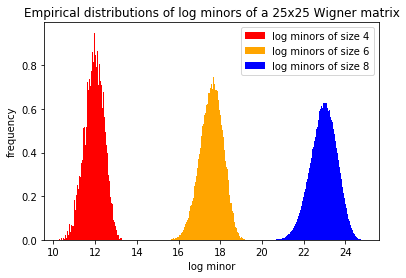

In [171]:
plt.hist(minors4,bins=100, density=True, color='red', label='log minors of size 4')[2]
plt.hist(minors6,bins=100, density=True, color='orange', label='log minors of size 6')[2]
plt.hist(minors8,bins=100, density=True, color='blue', label='log minors of size 8')[2]
plt.xlabel('log minor')
plt.ylabel('frequency')
plt.title('Empirical distributions of log minors of a 25x25 Wigner matrix')
plt.legend()

Let's compute the standard deviation and coefficient of variation of the empirical distribution of log-minors for a few values of n and k (This may take a few minutes):

In [169]:
def stdDev(arr_W,int_n,int_k):
    arr_Wsub = arr_W[:int_n,:int_n]
    list_minors = getLogMinors(arr_Wsub, int_k)
    return np.std(list_minors)

def coeffVar(arr_W,int_n,int_k):
    arr_Wsub = arr_W[:int_n,:int_n]
    list_minors = getLogMinors(arr_Wsub, int_k)
    return np.std(list_minors)/np.abs(np.mean(list_minors))

n_list = [10,12,14,16,18,20]
k_list = [2,3,4,5,6,7,8,9,10]
W = getWigner(max(n_list))

def printTables(fun, arr_W, list_n, list_k):
    #standard deviation
    print('       ' + "".join(['| n = ' + str(list_n[i]) + ' ' for i in range(len(list_n))]))
    print('-'*(7+len(list_n)*9))
    for k in list_k:
        if len(str(k))==1:
            print('k =  '+str(k)+' | ', end='')
        else:
            print('k = '+str(k)+' | ', end='')
        for n in list_n:
            print(("%.4f" % fun(*(arr_W,n,k))) + ' | ', end='')
        print('')
    print('')
    
printTables(stdDev, W, n_list, k_list)
printTables(coeffVar, W, n_list, k_list)

       | n = 10 | n = 12 | n = 14 | n = 16 | n = 18 | n = 20 
-------------------------------------------------------------
k =  2 | 0.4830 | 0.4729 | 0.4560 | 0.4516 | 0.4712 | 0.4581 | 
k =  3 | 0.5669 | 0.5666 | 0.5457 | 0.5442 | 0.5677 | 0.5507 | 
k =  4 | 0.6234 | 0.6376 | 0.6138 | 0.6173 | 0.6440 | 0.6242 | 
k =  5 | 0.6566 | 0.6911 | 0.6660 | 0.6769 | 0.7062 | 0.6853 | 
k =  6 | 0.6657 | 0.7286 | 0.7047 | 0.7258 | 0.7573 | 0.7373 | 
k =  7 | 0.6450 | 0.7489 | 0.7305 | 0.7649 | 0.7989 | 0.7826 | 
k =  8 | 0.5828 | 0.7485 | 0.7428 | 0.7943 | 0.8317 | 0.8225 | 
k =  9 | 0.4516 | 0.7198 | 0.7395 | 0.8129 | 0.8558 | 0.8583 | 
k = 10 | 0.0000 | 0.6488 | 0.7168 | 0.8191 | 0.8712 | 0.8909 | 

       | n = 10 | n = 12 | n = 14 | n = 16 | n = 18 | n = 20 
-------------------------------------------------------------
k =  2 | 0.0838 | 0.0811 | 0.0776 | 0.0768 | 0.0803 | 0.0777 | 
k =  3 | 0.0662 | 0.0653 | 0.0624 | 0.0622 | 0.0650 | 0.0628 | 
k =  4 | 0.0551 | 0.0556 | 0.0531 | 0.0533 | 0.

Let's repeat these computations, but this time we normalise the Wigner matrix by its size:

In [170]:
def stdDevNorm(arr_W,int_n,int_k):
    arr_Wsub = arr_W[:int_n,:int_n]/float(int_n) #norm
    list_minors = getLogMinors(arr_Wsub, int_k)
    return np.std(list_minors)

def coeffVarNorm(arr_W,int_n,int_k):
    arr_Wsub = arr_W[:int_n,:int_n]/float(int_n) #norm
    list_minors = getLogMinors(arr_Wsub, int_k)
    return np.std(list_minors)/np.abs(np.mean(list_minors))

printTables(stdDevNorm, W, n_list, k_list)
printTables(coeffVarNorm, W, n_list, k_list)

       | n = 10 | n = 12 | n = 14 | n = 16 | n = 18 | n = 20 
-------------------------------------------------------------
k =  2 | 0.4830 | 0.4729 | 0.4560 | 0.4516 | 0.4712 | 0.4581 | 
k =  3 | 0.5669 | 0.5666 | 0.5457 | 0.5442 | 0.5677 | 0.5507 | 
k =  4 | 0.6234 | 0.6376 | 0.6138 | 0.6173 | 0.6440 | 0.6242 | 
k =  5 | 0.6566 | 0.6911 | 0.6660 | 0.6769 | 0.7062 | 0.6853 | 
k =  6 | 0.6657 | 0.7286 | 0.7047 | 0.7258 | 0.7573 | 0.7373 | 
k =  7 | 0.6450 | 0.7489 | 0.7305 | 0.7649 | 0.7989 | 0.7826 | 
k =  8 | 0.5828 | 0.7485 | 0.7428 | 0.7943 | 0.8317 | 0.8225 | 
k =  9 | 0.4516 | 0.7198 | 0.7395 | 0.8129 | 0.8558 | 0.8583 | 
k = 10 | 0.0000 | 0.6488 | 0.7168 | 0.8191 | 0.8712 | 0.8909 | 

       | n = 10 | n = 12 | n = 14 | n = 16 | n = 18 | n = 20 
-------------------------------------------------------------
k =  2 | 0.4175 | 0.5493 | 0.7671 | 1.3380 | 5.3066 | 4.6311 | 
k =  3 | 0.3417 | 0.4642 | 0.6624 | 1.2489 | 8.6959 | 2.5429 | 
k =  4 | 0.2960 | 0.4171 | 0.6114 | 1.2804 | 82

### Observations

For a given matrix size n, the standard deviation of an empirical distribution of log-minors of size k tends to be greatest for k around n/2. 

Coefficients of variation for the empirical distributions tend to 
* decrease with increasing k (for fixed n) 
* decrease with n (for fixed ratio k/n) \* 

Observations on the coefficient of variation change if I introduce some normalisation for the Wigner matrices.

\* This is a very cool, but very tentative result, based on comparison coefficients of variation for matrix sizes n = 10 and n = 20.

### How can I explain what I see?

For the observation on the standard deviation of the empirical distribution of log-minors, one can Cauchy's interlacing theorem for eigenvalues of principal submatrices to derive a bound for the standard deviation that depends on k and the condition number of the covariance matrix. This is not a concentration result. The bound does not approach zero in the large-n limit. I am not sure whether that bound is sharp or whether I can do better.

For estimating sample sizes, the observations on the coefficient of variation may be more helpful than the observations on the standard deviation. But the coefficient of variation should also be harder to work with analytically than the standard deviation.